In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

In [ ]:
#pd.set_option('max_rows', 99999)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#GDP verisetinden 2012 yılına ait tüm gdp verileri ile ülke bazında DataFrame oluşturuldu (Wikipedia)
gdp_by_year_wikipedia = pd.read_csv("/content/drive/MyDrive/terror/gdp_wikipedia_2010-2019.csv",encoding='ISO-8859-1')
gdp_by_year_wikipedia.rename(columns={'Country (or dependent territory)':'Country','2012':'GDP'},inplace=True)
gdp_by_year_wikipedia

,Country,2010,2011,GDP,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,15325.0,17890,20296,20170,20352,19687,19454,20235,19585,19990
1,Albania,11938.0,12896,12323,12784,13238,11393,11865,13055,15202,15960
2,Algeria,161207.0,199394,209005,209703,213518,164779,159049,167555,180441,183687
3,Angola,82471.0,104116,115342,124912,126777,102962,95337,122124,107316,92191
4,Antigua and Barbuda,1146.0,1140,1214,1194,1273,1353,1460,1516,1626,1717
...,...,...,...,...,...,...,...,...,...,...,...
189,Vietnam,112771.0,134576,155483,170444,185759,191288,201309,220376,241272,260301
190,Yemen,30907.0,32726,35401,40415,43229,37734,20901,26819,26914,29079
191,Zambia,20265.0,23460,25504,28046,27151,21243,20941,25868,25179,24615
192,Zimbabwe,9445.0,10956,12472,13490,14197,14171,16117,21890,26127,22290


In [ ]:
gdp_by_year_wikipedia_2012 = gdp_by_year_wikipedia[['Country','GDP']]

In [ ]:
gdp_by_year_wikipedia_2012

,Country,GDP
0,Afghanistan,20296
1,Albania,12323
2,Algeria,209005
3,Angola,115342
4,Antigua and Barbuda,1214
...,...,...
189,Vietnam,155483
190,Yemen,35401
191,Zambia,25504
192,Zimbabwe,12472


In [ ]:
gdp_by_year_wikipedia_2012.dtypes

Country    object
GDP         int64
dtype: object

In [ ]:
gdp_by_year_wikipedia_2012[gdp_by_year_wikipedia_2012["GDP"].isna()]

,Country,GDP


In [ ]:
gdp_by_year_wikipedia_2012.isna().sum()

Country    0
GDP        0
dtype: int64

In [ ]:
gdp_by_year_wikipedia_2012

,Country,GDP
0,Afghanistan,20296
1,Albania,12323
2,Algeria,209005
3,Angola,115342
4,Antigua and Barbuda,1214
...,...,...
189,Vietnam,155483
190,Yemen,35401
191,Zambia,25504
192,Zimbabwe,12472


In [ ]:
gdp_by_year_wikipedia_2012['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Switzerland', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Democratic Republic of the Congo',
       'Republic of the Congo', 'Costa Rica', 'Ivory Coast', 'Croatia',
       'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
       'Guinea-Bissau'

In [ ]:
gdp_by_year_wikipedia_2012.Country = gdp_by_year_wikipedia_2012.Country.apply(lambda x: x.strip())

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
gdp_by_year_wikipedia_2012

,Country,GDP
0,Afghanistan,20296
1,Albania,12323
2,Algeria,209005
3,Angola,115342
4,Antigua and Barbuda,1214
...,...,...
189,Vietnam,155483
190,Yemen,35401
191,Zambia,25504
192,Zimbabwe,12472


In [ ]:
#Burada sadece popoulation verisi alındı
population_data_2012 = pd.read_csv("/content/drive/MyDrive/terror/population-figures-by-country-csv_csv.csv",encoding='ISO-8859-1')
population_data_2012.rename(columns={'Year_2012':'Population'},inplace=True)

In [ ]:
population_data_2012=population_data_2012[['Country','Population']]

In [ ]:
population_data_2012

,Country,Population
0,Aruba,102577.00
1,Afghanistan,30696958.00
2,Angola,25096150.00
3,Albania,2900401.00
4,Andorra,82431.00
...,...,...
257,South Africa,52506515.08
258,Zambia,14699937.00
259,Zimbabwe,14710826.00
260,West Bank and Gaza Strip,4046901.00


In [ ]:
population_data_2012.isna().sum()

Country       0
Population    0
dtype: int64

In [ ]:
len(population_data_2012)

262

In [ ]:
terror_data_1970_2016 = pd.read_csv("/content/drive/MyDrive/terror/globalterrorismdb_0617dist.csv",encoding='ISO-8859-1')
terror_data_1970_2016.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror_data_1970_2016=terror_data_1970_2016[['Year','Month','Day','Country','Region','City','Latitude','Longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','Summary']]
terror_data_1970_2016['Casualities']=terror_data_1970_2016['Killed']+terror_data_1970_2016['Wounded']
terror_data_1970_2016.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Summary,Casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.983773,23.728157,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives/Bombs/Dynamite,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN,NaN


In [ ]:
len(terror_data_1970_2016['Country'].unique())

205

In [ ]:
filter_year = terror_data_1970_2016['Year'] == 2012

In [ ]:
terror_count_2012 = pd.DataFrame({'count' : terror_data_1970_2016[filter_year].groupby( ["Country", "Year"] ).size()}).reset_index()
terror_count_2012

,Country,Year,count
0,Afghanistan,2012,1468
1,Algeria,2012,41
2,Argentina,2012,2
3,Bahrain,2012,26
4,Bangladesh,2012,18
...,...,...,...
78,United Kingdom,2012,54
79,United States,2012,19
80,Venezuela,2012,1
81,West Bank and Gaza Strip,2012,23


In [ ]:
terror_data_count_2012 = terror_data_1970_2016[filter_year]

In [ ]:
terror_count = terror_data_count_2012['Country'].value_counts()

In [ ]:
terror_count

Pakistan         1652
Afghanistan      1468
Iraq             1437
Nigeria           616
India             611
                 ... 
Laos                1
Liberia             1
Madagascar          1
Spain               1
Guinea-Bissau       1
Name: Country, Length: 83, dtype: int64

In [ ]:
df = terror_count.to_frame()
df = df.rename(columns = {0:'Country'},index=None)
count_event=pd.DataFrame({'Country':terror_count.index, 'Count':terror_count})

In [ ]:
#2012 yılına ait ülke bazında toplam terör sayısı
count_event

,Country,Count
Pakistan,Pakistan,1652
Afghanistan,Afghanistan,1468
Iraq,Iraq,1437
Nigeria,Nigeria,616
India,India,611
...,...,...
Laos,Laos,1
Liberia,Liberia,1
Madagascar,Madagascar,1
Spain,Spain,1


In [ ]:
terror_data_casualities = terror_data_1970_2016[['Country','Casualities']]

In [ ]:
terror_data_casualities_2012 = terror_data_casualities[filter_year]

In [ ]:
terror_data_casualities_2012.Country = terror_data_casualities_2012.Country.apply(lambda x: x.strip())

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
unique_casualities_2012 = terror_data_casualities_2012.groupby(['Country']).sum()

In [ ]:
#2012 yılına ait ülke bazında tüm terör olaylarındaki ölü ve yaralı sayıları toplamı
(unique_casualities_2012)

,Casualities
Country,
Afghanistan,8065.0
Algeria,135.0
Argentina,0.0
Bahrain,41.0
Bangladesh,40.0
...,...
United Kingdom,3.0
United States,14.0
Venezuela,2.0


In [ ]:
# gdp_by_year_wikipedia_2012
# population_data_new
# count_event
# unique_casualities_2012

In [ ]:
gdp_by_year_wikipedia_2012.Country = gdp_by_year_wikipedia_2012.Country.apply(lambda x: x.strip())
population_data_2012.Country = population_data_2012.Country.apply(lambda x: x.strip())
count_event.Country = count_event.Country.apply(lambda x: x.strip())

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
#merged_data1 = gdp_by_year_wikipedia_2012.merge(population_data_new, how = 'outer', on = ['Country'])
#merged_data2 = merged_data1.merge(count_event, how = 'outer', on = ['Country'])
#merged_data3 = merged_data2.merge(unique_casualities_2012, how = 'outer', on = ['Country'])

In [ ]:
#merged_data3

In [ ]:
#merged_data3.Count.fillna(0,inplace=True)
#merged_data3.Casualities.fillna(0,inplace=True)

In [ ]:
#len(merged_data3.dropna(how="any"))

In [ ]:
merged_data = gdp_by_year_wikipedia_2012.merge(population_data_2012, how = 'inner', on = ['Country'])
merged_data = merged_data.merge(count_event, how = 'inner', on = ['Country'])
merged_data_2012 = merged_data.merge(unique_casualities_2012, how = 'inner', on = ['Country'])

In [ ]:
merged_data_2012.isna().sum()

Country        0
GDP            0
Population     0
Count          0
Casualities    0
dtype: int64

In [ ]:
len(merged_data_2012)

83

In [ ]:
merged_data_2012

,Country,GDP,Population,Count,Casualities
0,Afghanistan,20296,30696958.0,1468,8065.0
1,Algeria,209005,37565847.0,41,135.0
2,Argentina,579666,42096739.0,2,0.0
3,Bahrain,30743,1300217.0,26,41.0
4,Bangladesh,141705,155727053.0,18,40.0
...,...,...,...,...,...
78,United Kingdom,2655458,63700300.0,54,3.0
79,United States,16155250,313998379.0,19,14.0
80,Venezuela,331457,29893080.0,1,2.0
81,Yemen,35401,24909969.0,312,1628.0


In [ ]:
merged_data_2012.dropna(how='any')

,Country,GDP,Population,Count,Casualities
0,Afghanistan,20296,30696958.0,1468,8065.0
1,Algeria,209005,37565847.0,41,135.0
2,Argentina,579666,42096739.0,2,0.0
3,Bahrain,30743,1300217.0,26,41.0
4,Bangladesh,141705,155727053.0,18,40.0
...,...,...,...,...,...
78,United Kingdom,2655458,63700300.0,54,3.0
79,United States,16155250,313998379.0,19,14.0
80,Venezuela,331457,29893080.0,1,2.0
81,Yemen,35401,24909969.0,312,1628.0


In [ ]:
#Formülasyon
merged_data_2012['Total_Risk']=((merged_data_2012['Casualities']/merged_data_2012['Count']) / (merged_data_2012['GDP']/merged_data_2012['Population']))*100000

In [ ]:
merged_data_2012.isna().sum()

Country        0
GDP            0
Population     0
Count          0
Casualities    0
Total_Risk     0
dtype: int64

In [ ]:
merged_data_2012

,Country,GDP,Population,Count,Casualities,Total_Risk
0,Afghanistan,20296,30696958.0,1468,8065.0,8.309276e+08
1,Algeria,209005,37565847.0,41,135.0,5.918156e+07
2,Argentina,579666,42096739.0,2,0.0,0.000000e+00
3,Bahrain,30743,1300217.0,26,41.0,6.669298e+06
4,Bangladesh,141705,155727053.0,18,40.0,2.442116e+08
...,...,...,...,...,...,...
78,United Kingdom,2655458,63700300.0,54,3.0,1.332691e+05
79,United States,16155250,313998379.0,19,14.0,1.432149e+06
80,Venezuela,331457,29893080.0,1,2.0,1.803738e+07
81,Yemen,35401,24909969.0,312,1628.0,3.671618e+08


In [ ]:
from bokeh.models import NumeralTickFormatter
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource
from math import pi
from bokeh.io import output_notebook
from bokeh.io import export_png
from bokeh.io import curdoc, output_notebook
from bokeh.models import HoverTool
#from bokeh.layouts import widgetbox, row, column
from bokeh.palettes import brewer
from bokeh.models import FixedTicker,NumeralTickFormatter
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
import folium


In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 4.6MB/s 
     |████████████████████████████████| 14.8MB 325kB/s 
     |████████████████████████████████| 6.5MB 45.2MB/s 


In [ ]:
world_geo = r'/content/drive/MyDrive/world_countries.json' # geojson file
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
m4 = folium.Map(location=[0, 0],zoom_start=2,tiles='Mapbox Bright')
bins = list(merged_data_2012['Total_Risk'].quantile([0, 0.5, 0.85, 0.98, 1]))
m4.choropleth(
    geo_data=world_geo,
    name='Terör Risk Haritası',
    data=merged_data_2012,
    columns=['Country','Total_Risk'],
    key_on='feature.properties.name',
    bins=bins,
    #threshold_scale=[0, 8058, 16116, 24174, 70000.173353742426],
    fill_color='YlOrRd',
    nan_fill_color='white',
    fill_opacity=0.8,
    line_opacity=0.9,
    legend_name='2012'
)
folium.LayerControl().add_to(m4)

/usr/local/lib/python3.7/dist-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
m4

In [ ]:
# year_select=2016
 
# #gdp_by_year_wikipedia.rename(columns={'Country (or dependent territory)':'Country',""+str(year_select)+"":'GDP'},inplace=True)
# gdp_by_year_wikipedia
# gdp_by_year_wikipedia.rename(columns={'Country (or dependent territory)':'Country'},inplace=True)
# gdp_by_year_wikipedia_2012 = gdp_by_year_wikipedia[['Country',""+str(year_select)+""]]
# gdp_by_year_wikipedia_2012.Country = gdp_by_year_wikipedia_2012.Country.apply(lambda x: x.strip())

# #Burada sadece popoulation verisi alındı

# population_data_new.rename(columns={'Year_'+str(year_select):'Population'},inplace=True)
# population_data_new=population_data_new[['Country','Population']]



# terror_data_1970_2016.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
# terror_data_1970_2016=terror_data_1970_2016[['Year','Month','Day','Country','Region','City','Latitude','Longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive','Summary']]
# terror_data_1970_2016['Casualities']=terror_data_1970_2016['Killed']+terror_data_1970_2016['Wounded']

# filter_year = terror_data_1970_2016['Year'] == year_select
# terror_data_2012 = terror_data_1970_2016[filter_year]
# terror_count = terror_data_2012['Country'].value_counts()

# df = terror_count.to_frame()
# df = df.rename(columns = {0:'Country'},index=None)
# count_event=pd.DataFrame({'Country':terror_count.index, 'Count':terror_count})

# terror_data_casualities = terror_data_1970_2016[['Country','Casualities']]



# terror_data_casualities_2012 = terror_data_casualities[filter_year]


# terror_data_casualities_2012.Country = terror_data_casualities_2012.Country.apply(lambda x: x.strip())



# unique_casualities_2012 = terror_data_casualities_2012.groupby(['Country']).sum()

# gdp_by_year_wikipedia_2012.Country = gdp_by_year_wikipedia_2012.Country.apply(lambda x: x.strip())
# population_data_new.Country = population_data_new.Country.apply(lambda x: x.strip())
# count_event.Country = count_event.Country.apply(lambda x: x.strip())

# merged_data = gdp_by_year_wikipedia_2012.merge(population_data_new, how = 'inner', on = ['Country'])
# merged_data = merged_data.merge(count_event, how = 'inner', on = ['Country'])
# merged_data = merged_data.merge(unique_casualities_2012, how = 'inner', on = ['Country'])
# merged_data.dropna(how='any')

# #Formülasyon
# merged_data['Total_Risk'+str(year_select)]=((merged_data['Casualities']/merged_data['Count']) / (merged_data[str(year_select)]/merged_data['Population']))

# #copy_dataframe= merged_data.copy()
# copy_dataframe['Total_Risk'+str(year_select)]=merged_data['Total_Risk'+str(year_select)]


In [ ]:
#copy_dataframe

In [ ]:
#copy_dataframe.memory_usage(index=True)

In [ ]:
terror_data_2010_2016 = terror_data_1970_2016[terror_data_1970_2016['Year']>=2010]

In [ ]:
terror_data_2010_2016

,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Summary,Casualities
94760,2010,1,1,Afghanistan,South Asia,Dwah Mande,33.469444,69.620278,Bombing/Explosion,4.0,0.0,The vehicle,"01/01/2010: On Friday afternoon, in the Dwaman...",Taliban,Private Citizens & Property,Explosives/Bombs/Dynamite,The specific motive for the attack is unknown.,"01/01/2010: On Friday afternoon, in the Dwaman...",4.0
94761,2010,1,1,Pakistan,South Asia,Orakzai district,33.697271,71.144852,Bombing/Explosion,0.0,0.0,A pro-government tribal elder's residence,"01/01/2010: On Friday, the residence of a pro-...",Tehrik-i-Taliban Pakistan (TTP),Private Citizens & Property,Explosives/Bombs/Dynamite,The specific motive for the attack is unknown.,"01/01/2010: On Friday, the residence of a pro-...",0.0
94762,2010,1,1,Pakistan,South Asia,Karachi,24.961867,67.056885,Bombing/Explosion,0.0,0.0,Civilians were the target of the attack.,"01/01/2010: On Friday, contradicting reports s...",Unknown,Private Citizens & Property,Explosives/Bombs/Dynamite,The specific motive for the attack is unknown.,"01/01/2010: On Friday, contradicting reports s...",0.0
94763,2010,1,1,Pakistan,South Asia,Bajaur district,34.856902,71.429936,Bombing/Explosion,0.0,0.0,A primary school,"01/01/2010: On Friday late in the day, in one ...",Unknown,Educational Institution,Explosives/Bombs/Dynamite,The specific motive for the attack is unknown.,"01/01/2010: On Friday late in the day, in one ...",0.0
94764,2010,1,1,Pakistan,South Asia,Bajaur district,34.856902,71.429936,Bombing/Explosion,0.0,0.0,A boy's high school was targeted in the attack.,"01/01/2010: On Friday late in the day, in one ...",Unknown,Educational Institution,Explosives/Bombs/Dynamite,The specific motive for the attack is unknown.,"01/01/2010: On Friday late in the day, in one ...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170345,2016,12,31,Niger,Sub-Saharan Africa,Garoua,13.883032,13.177504,Unknown,15.0,7.0,Soldiers,12/31/2016: Assailants attacked military posit...,Boko Haram,Military,Unknown,NaN,12/31/2016: Assailants attacked military posit...,22.0
170346,2016,12,31,Philippines,Southeast Asia,Talitay,7.027067,124.386552,Bombing/Explosion,0.0,0.0,Convoy of Relief Workers,12/31/2016: An explosive device detonated targ...,Unknown,NGO,Explosives/Bombs/Dynamite,NaN,12/31/2016: An explosive device detonated targ...,0.0
170347,2016,12,31,Democratic Republic of the Congo,Sub-Saharan Africa,Nakolongbo,4.308611,25.091389,Hostage Taking (Kidnapping),0.0,NaN,Village,12/31/2016: Assailants attacked a village and ...,Lord's Resistance Army (LRA),Private Citizens & Property,Unknown,"The specific motive is unknown; however, sourc...",12/31/2016: Assailants attacked a village and ...,NaN
170348,2016,12,31,Mexico,North America,Guachochi,26.819644,-107.069898,Assassination,0.0,0.0,Residence of Journalist: Gabriel Valencia Juarez,12/31/2016: Assailants opened fire on the hous...,Unknown,Journalists & Media,Firearms,NaN,12/31/2016: Assailants opened fire on the hous...,0.0


In [ ]:
terror_data_1970_2016[(terror_data_1970_2016.Country=='Dominican Republic') & (terror_data_1970_2016.Year>=2000)]

,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Summary,Casualities
121763,2013,10,6,Dominican Republic,Central America & Caribbean,Bisono,19.562853,-70.867785,Assassination,0.0,0.0,President: Abel Martinez,10/06/2013: Assailants opened fire on the vehi...,Unknown,Government (General),Firearms,NaN,10/06/2013: Assailants opened fire on the vehi...,0.0
139476,2014,10,27,Dominican Republic,Central America & Caribbean,Santo Domingo,18.471297,-69.891941,Facility/Infrastructure Attack,0.0,35.0,Train,10/27/2014: An assailant set fire to a backpac...,Unknown,Transportation,Incendiary,NaN,10/27/2014: An assailant set fire to a backpac...,35.0


In [ ]:
terror_count_2010_2016 = terror_data_2010_2016[['Country','Year']]

In [ ]:
terror_count_2010_2016

,Country,Year
94760,Afghanistan,2010
94761,Pakistan,2010
94762,Pakistan,2010
94763,Pakistan,2010
94764,Pakistan,2010
...,...,...
170345,Niger,2016
170346,Philippines,2016
170347,Democratic Republic of the Congo,2016
170348,Mexico,2016


In [ ]:
terror_count_2010_2016 = pd.DataFrame({'Count' : terror_data_1970_2016[terror_data_1970_2016['Year']>=2010].groupby( ["Country", "Year"] ).size()}).reset_index()
terror_count_2010_2016

,Country,Year,Count
0,Afghanistan,2010,541
1,Afghanistan,2011,421
2,Afghanistan,2012,1468
3,Afghanistan,2013,1441
4,Afghanistan,2014,1821
...,...,...,...
625,Yemen,2016,521
626,Zimbabwe,2010,1
627,Zimbabwe,2011,1
628,Zimbabwe,2013,3


In [ ]:
countries_by_year_2010_2016 = terror_data_2010_2016[['Country','Year']]

In [ ]:
countries_by_year_2010_2016

,Country,Year
94760,Afghanistan,2010
94761,Pakistan,2010
94762,Pakistan,2010
94763,Pakistan,2010
94764,Pakistan,2010
...,...,...
170345,Niger,2016
170346,Philippines,2016
170347,Democratic Republic of the Congo,2016
170348,Mexico,2016


In [ ]:
population_data_new = pd.read_csv("/content/drive/MyDrive/terror/population-figures-by-country-csv_csv.csv",encoding='ISO-8859-1')

In [ ]:
population_data_new

,Country,Country_Code,Year_1960,Year_1961,Year_1962,Year_1963,Year_1964,Year_1965,Year_1966,Year_1967,Year_1968,Year_1969,Year_1970,Year_1971,Year_1972,Year_1973,Year_1974,Year_1975,Year_1976,Year_1977,Year_1978,Year_1979,Year_1980,Year_1981,Year_1982,Year_1983,Year_1984,Year_1985,Year_1986,Year_1987,Year_1988,Year_1989,Year_1990,Year_1991,Year_1992,Year_1993,Year_1994,Year_1995,Year_1996,Year_1997,Year_1998,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149,64622,68235.0,72504.0,76700.0,80324,83200,85451,87277,89005,90853,92898,94992.00,97017.0,98737.00,100031.00,100832.00,101220.00,101353.0,101453.00,101669.00,102053.00,102577.00,103187.00,103795.00,104341.00,104822
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,11126123.0,11417825.0,11721940.0,12027822.0,12321541.0,12590286.0,12840299.0,13067538.0,13237734.0,13306695.0,13248370.0,13053954.0,12749645.0,12389269.0,12047115.0,11783050.0,11601041.0,11502761.0,11540888.0,11777609.0,12249114,12993657,13981231.0,15095099.0,16172719.0,17099541,17822884,18381605,18863999,19403676,20093756,20966463,21979923.00,23064851.0,24118979.00,25070798.00,25893450.00,26616792.00,27294031.0,28004331.00,28803167.00,29708599.00,30696958.00,31731688.00,32758020.00,33736494.00,34656032
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,6776381.0,6927269.0,7094834.0,7277960.0,7474338.0,7682479.0,7900997.0,8130988.0,8376147.0,8641521.0,8929900.0,9244507.0,9582156.0,9931562.0,10277321.0,10609042.0,10921037.0,11218268.0,11513968.0,11827237.0,12171441,12553446,12968345.0,13403734.0,13841301.0,14268994,14682284,15088981,15504318,15949766,16440924,16983266,17572649.00,18203369.0,18865716.00,19552542.00,20262399.00,20997687.00,21759420.0,22549547.00,23369131.00,24218565.00,25096150.00,25998340.00,26920466.00,27859305.00,28813463
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542,3266790,3247039.0,3227287.0,3207536.0,3187784,3168033,3148281,3128530,3108778,3089027,3060173,3051010.00,3039616.0,3026939.00,3011487.00,2992547.00,2970017.00,2947314.0,2927519.00,2913021.00,2905195.00,2900401.00,2895092.00,2889104.00,2880703.00,2876101
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509,56671,58888.0,60971.0,62677.0,63850,64360,64327,64142,64370,65390,67341,70049.00,73182.0,76244.00,78867.00,80991.00,82683.00,83861.0,84462.00,84449.00,83751.00,82431.00,80788.00,79223.00,78014.00,77281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,South Africa,ZAF,17396367.0,17850045.0,18322335.0,18809939.0,19308166.0,19813947.0,20325230.0,20843785.0,21374931.0,21926165.0,22502502.0,23106806.0,23736489.0,24384538.0,25040940.0,25698856.0,26354140.0,27009755.0,27674446.0,28360820.0,29077143.0,29828874.0,30611206.0,31409913.0,32204952.0,32983013.0,33733547.0,34463077.0,35195598.0,35965131.0,36793490,37692367,38646788.0,39619539.0,40558495.0,41426810,42210216

In [ ]:
population_df_2010_2016 = pd.DataFrame(columns = ['Country', 'Year','Population']) 
for index, row in population_data_new.iterrows():
  for yil in range(2010,2017):
    data = [{'Country': row['Country'],'Year': str(yil),'Population':row['Year_'+str(yil)]}]
    population_df_2010_2016 = population_df_2010_2016.append(data)
population_df_2010_2016

,Country,Year,Population
0,Aruba,2010,101669.0
0,Aruba,2011,102053.0
0,Aruba,2012,102577.0
0,Aruba,2013,103187.0
0,Aruba,2014,103795.0
...,...,...,...
0,Serbia,2012,7199077.0
0,Serbia,2013,7164132.0
0,Serbia,2014,7130576.0
0,Serbia,2015,7095383.0


In [ ]:
gdp_by_year_wikipedia_1 = pd.read_csv("/content/drive/MyDrive/terror/gdp_wikipedia_2010-2019.csv",encoding='ISO-8859-1')
gdp_by_year_wikipedia_1.columns

Index(['Country (or dependent territory)', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019'],
      dtype='object')

In [ ]:
gdp_df_2010_2016 = pd.DataFrame(columns = ['Country', 'Year','GDP']) 
for index, row in gdp_by_year_wikipedia_1.iterrows():
  for yil in range(2010,2017):
    data = [{'Country': row['Country (or dependent territory)'],'Year': str(yil),'GDP':row[str(yil)]}]
    gdp_df_2010_2016 = gdp_df_2010_2016.append(data)
gdp_df_2010_2016

,Country,Year,GDP
0,Afghanistan,2010,15325.0
0,Afghanistan,2011,17890.0
0,Afghanistan,2012,20296.0
0,Afghanistan,2013,20170.0
0,Afghanistan,2014,20352.0
...,...,...,...
0,West Bank and Gaza Strip,2012,122084.0
0,West Bank and Gaza Strip,2013,135155.0
0,West Bank and Gaza Strip,2014,139897.0
0,West Bank and Gaza Strip,2015,139724.0


In [ ]:
population_df_2010_2016

,Country,Year,Population
0,Aruba,2010,101669.0
0,Aruba,2011,102053.0
0,Aruba,2012,102577.0
0,Aruba,2013,103187.0
0,Aruba,2014,103795.0
...,...,...,...
0,Serbia,2012,7199077.0
0,Serbia,2013,7164132.0
0,Serbia,2014,7130576.0
0,Serbia,2015,7095383.0


In [ ]:
population_gdp_df=population_df_2010_2016.merge(gdp_df_2010_2016,how='inner',left_on=['Country','Year'],right_on=['Country','Year'])
population_gdp_df['Country'] = population_gdp_df['Country'].astype('str') 
terror_count_2010_2016['Country'] = terror_count_2010_2016['Country'].astype('str')
population_gdp_df['Year'] = population_gdp_df['Year'].astype(int) 
population_gdp_terror_df=population_gdp_df.merge(terror_count_2010_2016,how='inner',left_on=['Country','Year'],right_on=['Country','Year'])
population_gdp_terror_df

,Country,Year,Population,GDP,Count
0,Afghanistan,2010,28803167.0,15325.0,541
1,Afghanistan,2011,29708599.0,17890.0,421
2,Afghanistan,2012,30696958.0,20296.0,1468
3,Afghanistan,2013,31731688.0,20170.0,1441
4,Afghanistan,2014,32758020.0,20352.0,1821
...,...,...,...,...,...
620,West Bank and Gaza Strip,2014,4294682.0,139897.0,133
621,West Bank and Gaza Strip,2015,4422143.0,139724.0,246
622,West Bank and Gaza Strip,2016,4551566.0,154054.0,157
623,Serbia,2010,7291436.0,39035.0,1


In [ ]:
terror_casualities_2010_2016 = terror_data_2010_2016[['Country','Year','Casualities']]

In [ ]:
terror_casualities_2010_2016_sum=terror_casualities_2010_2016.groupby( ["Country", "Year"]).sum()


In [ ]:
terror_casualities_2010_2016_sum

Casualities
Country     Year             
Afghanistan 2010       2717.0
            2011       3356.0
            2012       8065.0
            2013       7774.0
            2014       9794.0
...                       ...
Yemen       2016       2540.0
Zimbabwe    2010          2.0
            2011          0.0
            2013          2.0
            2014          0.0

[630 rows x 1 columns]

In [ ]:
terror_casualities_2010_2016=terror_casualities_2010_2016_sum.merge(population_gdp_terror_df,how='inner',left_on=['Country','Year'],right_on=['Country','Year'])
terror_casualities_2010_2016

,Country,Year,Casualities,Population,GDP,Count
0,Afghanistan,2010,2717.0,28803167.0,15325.0,541
1,Afghanistan,2011,3356.0,29708599.0,17890.0,421
2,Afghanistan,2012,8065.0,30696958.0,20296.0,1468
3,Afghanistan,2013,7774.0,31731688.0,20170.0,1441
4,Afghanistan,2014,9794.0,32758020.0,20352.0,1821
...,...,...,...,...,...,...
620,Yemen,2016,2540.0,27584213.0,20901.0,521
621,Zimbabwe,2010,2.0,14086317.0,9445.0,1
622,Zimbabwe,2011,0.0,14386649.0,10956.0,1
623,Zimbabwe,2013,2.0,15054506.0,13490.0,3


In [ ]:
terror_casualities_2010_2016['Total_Risk']=((terror_casualities_2010_2016['Casualities']/terror_casualities_2010_2016['Count']) / (terror_casualities_2010_2016['GDP']/terror_casualities_2010_2016['Population']))*100

In [ ]:
terror_casualities_2010_2016

,Country,Year,Casualities,Population,GDP,Count,Total_Risk
0,Afghanistan,2010,2717.0,28803167.0,15325.0,541,9.439134e+05
1,Afghanistan,2011,3356.0,29708599.0,17890.0,421,1.323767e+06
2,Afghanistan,2012,8065.0,30696958.0,20296.0,1468,8.309276e+05
3,Afghanistan,2013,7774.0,31731688.0,20170.0,1441,8.487266e+05
4,Afghanistan,2014,9794.0,32758020.0,20352.0,1821,8.656866e+05
...,...,...,...,...,...,...,...
620,Yemen,2016,2540.0,27584213.0,20901.0,521,6.434125e+05
621,Zimbabwe,2010,2.0,14086317.0,9445.0,1,2.982809e+05
622,Zimbabwe,2011,0.0,14386649.0,10956.0,1,0.000000e+00
623,Zimbabwe,2013,2.0,15054506.0,13490.0,3,7.439835e+04


In [ ]:
#terror_casualities_2010_2016.dropna(axis=0,how='any',inplace=True)

In [ ]:
#terror_casualities_2010_2016.isna().sum()

In [ ]:
terror_data_risk = terror_casualities_2010_2016[['Country','Year','Total_Risk']]

In [ ]:
terror_data_risk

,Country,Year,Total_Risk
0,Afghanistan,2010,9.439134e+05
1,Afghanistan,2011,1.323767e+06
2,Afghanistan,2012,8.309276e+05
3,Afghanistan,2013,8.487266e+05
4,Afghanistan,2014,8.656866e+05
...,...,...,...
620,Yemen,2016,6.434125e+05
621,Zimbabwe,2010,2.982809e+05
622,Zimbabwe,2011,0.000000e+00
623,Zimbabwe,2013,7.439835e+04


In [ ]:
terror_casualities_2010_2016[terror_casualities_2010_2016['Country']=='Bahrain']

,Country,Year,Casualities,Population,GDP,Count,Total_Risk
40,Bahrain,2010,0.0,1240862.0,25708.0,2,0.000000
41,Bahrain,2011,0.0,1278269.0,28770.0,1,0.000000
42,Bahrain,2012,41.0,1300217.0,30743.0,26,6669.297701
43,Bahrain,2013,42.0,1315411.0,32532.0,52,3265.853148
44,Bahrain,2014,48.0,1336397.0,33381.0,42,4575.389764
45,Bahrain,2015,27.0,1371855.0,31119.0,18,6612.624120
46,Bahrain,2016,3.0,1425171.0,32176.0,3,4429.298235


In [ ]:
terror_data_risk.dtypes

Country        object
Year            int64
Total_Risk    float64
dtype: object

In [ ]:
bins = [0,36560,146240,2339853, 4679707,9359414,23398538.086191382]

In [ ]:
terror_data_risk['Color']=pd.cut(terror_data_risk['Total_Risk'],bins,labels=['#FFEBEB','#F8D2D4','#EBA1A8','#E58892','#D13E50','#C50D24'],include_lowest=False)
#terror_data_risk['Color'].replace(np.nan,'#FFFFFF',inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
terror_data_risk['Color'] = terror_data_risk['Color'].cat.add_categories('#FFFFFF')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
terror_data_risk[terror_data_risk['Country']=='Bahrain']

,Country,Year,Total_Risk,Color
40,Bahrain,2010,0.000000,NaN
41,Bahrain,2011,0.000000,NaN
42,Bahrain,2012,6669.297701,#FFEBEB
43,Bahrain,2013,3265.853148,#FFEBEB
44,Bahrain,2014,4575.389764,#FFEBEB
45,Bahrain,2015,6612.624120,#FFEBEB
46,Bahrain,2016,4429.298235,#FFEBEB


In [ ]:
terror_data_risk.fillna("#FFFFFF",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
terror_data_risk[terror_data_risk['Country']=='Bahrain']

,Country,Year,Total_Risk,Color
40,Bahrain,2010,0.000000,#FFFFFF
41,Bahrain,2011,0.000000,#FFFFFF
42,Bahrain,2012,6669.297701,#FFEBEB
43,Bahrain,2013,3265.853148,#FFEBEB
44,Bahrain,2014,4575.389764,#FFEBEB
45,Bahrain,2015,6612.624120,#FFEBEB
46,Bahrain,2016,4429.298235,#FFEBEB


In [ ]:
terror_data_risk['Year']=(terror_data_risk['Year'].astype(int)).astype('U10')
terror_dict={}
for i in terror_data_risk['Country'].unique():
    terror_dict[i]={}
    for j in terror_data_risk[terror_data_risk['Country']==i].set_index(['Country']).values:   
        terror_dict[i][j[0]]={'color':j[2],'opacity':0.9}



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
terror_data_risk[terror_data_risk['Country']=='Bahrain']

,Country,Year,Total_Risk,Color
40,Bahrain,2010,0.000000,#FFFFFF
41,Bahrain,2011,0.000000,#FFFFFF
42,Bahrain,2012,6669.297701,#FFEBEB
43,Bahrain,2013,3265.853148,#FFEBEB
44,Bahrain,2014,4575.389764,#FFEBEB
45,Bahrain,2015,6612.624120,#FFEBEB
46,Bahrain,2016,4429.298235,#FFEBEB


In [ ]:
terror_dict

{'Afghanistan': {'2010': {'color': '#EBA1A8', 'opacity': 0.9},
  '2011': {'color': '#EBA1A8', 'opacity': 0.9},
  '2012': {'color': '#EBA1A8', 'opacity': 0.9},
  '2013': {'color': '#EBA1A8', 'opacity': 0.9},
  '2014': {'color': '#EBA1A8', 'opacity': 0.9},
  '2015': {'color': '#EBA1A8', 'opacity': 0.9},
  '2016': {'color': '#EBA1A8', 'opacity': 0.9}},
 'Albania': {'2013': {'color': '#FFFFFF', 'opacity': 0.9},
  '2014': {'color': '#FFEBEB', 'opacity': 0.9},
  '2015': {'color': '#FFFFFF', 'opacity': 0.9},
  '2016': {'color': '#FFFFFF', 'opacity': 0.9}},
 'Algeria': {'2010': {'color': '#F8D2D4', 'opacity': 0.9},
  '2011': {'color': '#F8D2D4', 'opacity': 0.9},
  '2012': {'color': '#F8D2D4', 'opacity': 0.9},
  '2013': {'color': '#F8D2D4', 'opacity': 0.9},
  '2014': {'color': '#F8D2D4', 'opacity': 0.9},
  '2015': {'color': '#F8D2D4', 'opacity': 0.9},
  '2016': {'color': '#FFEBEB', 'opacity': 0.9}},
 'Angola': {'2010': {'color': '#EBA1A8', 'opacity': 0.9},
  '2016': {'color': '#FFFFFF', 'opacit

In [ ]:
list(terror_dict.items())[10]

('Bahrain',
 {'2010': {'color': '#FFFFFF', 'opacity': 0.9},
  '2011': {'color': '#FFFFFF', 'opacity': 0.9},
  '2012': {'color': '#FFEBEB', 'opacity': 0.9},
  '2013': {'color': '#FFEBEB', 'opacity': 0.9},
  '2014': {'color': '#FFEBEB', 'opacity': 0.9},
  '2015': {'color': '#FFEBEB', 'opacity': 0.9},
  '2016': {'color': '#FFEBEB', 'opacity': 0.9}})

In [ ]:
import geopandas as gpd
fname = r'/content/drive/MyDrive/world_countries.json' # geojson file
world_geojson = gpd.read_file(fname)

In [ ]:
world_geojson

,id,name,geometry
0,AFG,Afghanistan,"POLYGON ((61.21082 35.65007, 62.23065 35.27066..."
1,AGO,Angola,"MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6..."
2,ALB,Albania,"POLYGON ((20.59025 41.85540, 20.46317 41.51509..."
3,ARE,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
4,ARG,Argentina,"MULTIPOLYGON (((-65.50000 -55.20000, -66.45000..."
...,...,...,...
172,PSE,West Bank,"POLYGON ((35.54566 32.39399, 35.54525 31.78251..."
173,YEM,Yemen,"POLYGON ((53.10857 16.65105, 52.38521 16.38241..."
174,ZAF,South Africa,"POLYGON ((31.52100 -29.25739, 31.32556 -29.401..."
175,ZMB,Zambia,"POLYGON ((32.75937 -9.23060, 33.23139 -9.67672..."


In [ ]:
from folium.plugins import TimeSliderChoropleth
from branca.element import Figure
fig6=Figure(height=800,width=1450)

m6 = folium.Map([24, 84], tiles='cartodbpositron', zoom_start=5)
fig6.add_child(m6)
g = TimeSliderChoropleth(
    world_geojson.set_index('name').to_json(),
    styledict=terror_dict
).add_to(m6)
m6

In [ ]:
terror_data_2015 = terror_data_1970_2016[terror_data_1970_2016.Year==2015]

In [ ]:
terror_data_2015.Country.value_counts()

Iraq           2744
Afghanistan    1927
Pakistan       1238
India           883
Philippines     720
               ... 
Malta             1
Uzbekistan        1
Georgia           1
Djibouti          1
Chile             1
Name: Country, Length: 99, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


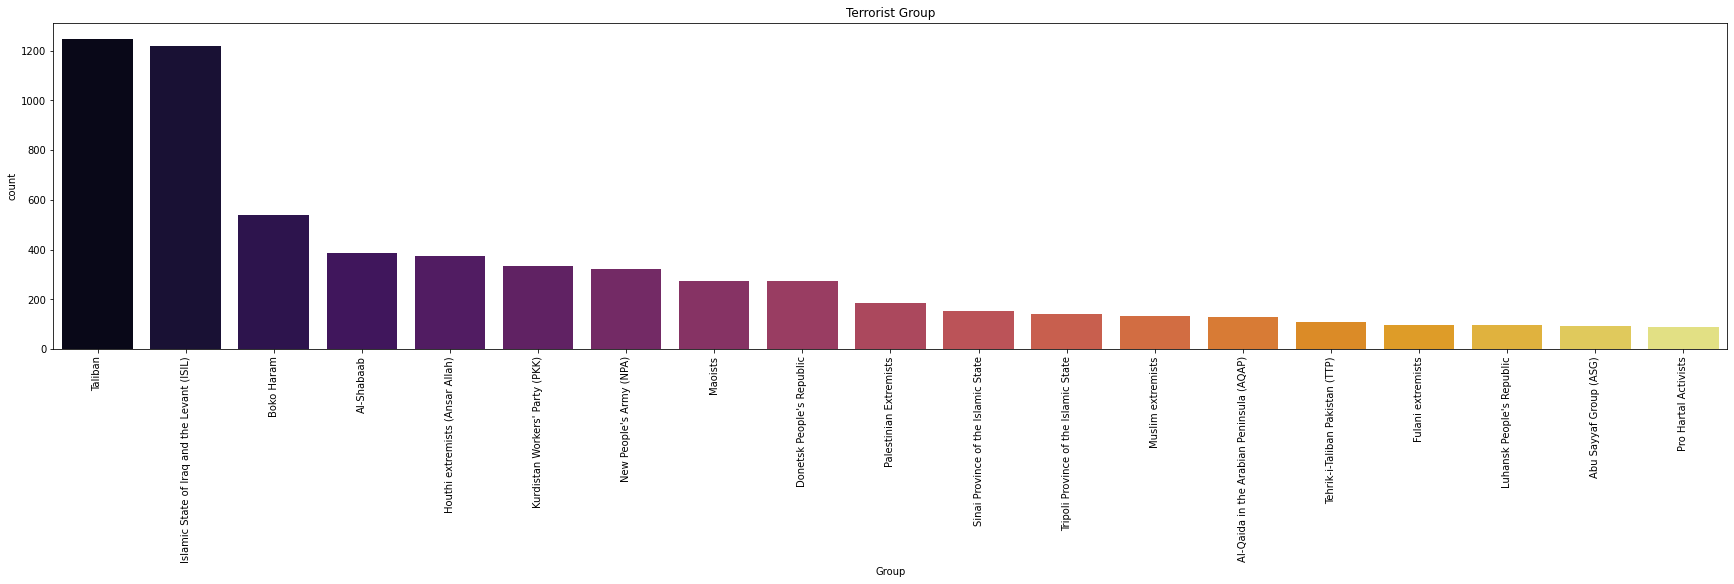

In [ ]:
plt.subplots(figsize=(30,6))
sns.countplot('Group',data=terror_data_2015,palette='inferno',order=terror_data_2015['Group'].value_counts().index[1:20])
plt.xticks(rotation=90)
plt.title('Terrorist Group')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


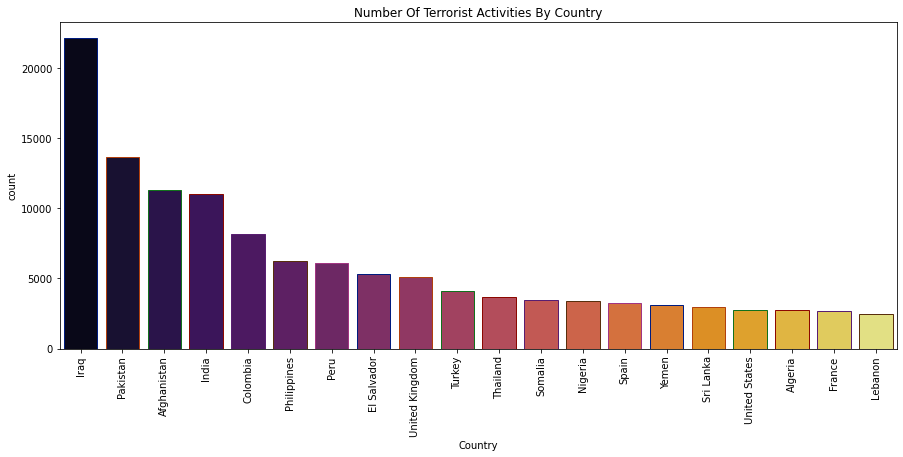

In [ ]:
plt.subplots(figsize=(15,6))
sns.countplot('Country',data=terror_data_1970_2016,palette='inferno',edgecolor=sns.color_palette('dark',7),order=terror_data_1970_2016['Country'].value_counts().index[0:20])
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Country')
plt.show()